# COFFEE QUALITY & SUSTAINABILITY

## Introduction to Coffee Quality Analysis

Coffee is one of the most popular beverages globally, enjoyed for its rich flavors and aromatic profiles. The diverse characteristics of coffee are influenced by various factors, including the region of origin, processing methods, and sensory evaluation features. Understanding the sensory attributes of coffee plays a crucial role in determining its overall quality and consumer appeal.

In this project, we aim to explore and analyze the sensory evaluation features of coffee samples to gain insights into the factors that contribute to coffee quality. We utilize a dataset containing sensory evaluation scores, including attributes like aroma, flavor, aftertaste, acidity, body, and balance, for numerous coffee samples sourced from different regions worldwide.

Our objective is to leverage data visualization techniques, statistical analysis, and machine learning tools to uncover patterns, correlations, and unique characteristics within the sensory attributes. By doing so, we can identify the key factors that contribute to high-quality coffee, discover regional variations, and provide valuable insights for coffee producers, roasters, and enthusiasts in their pursuit of exceptional coffee experiences.

Through visualizations such as 3D scatter plots, box plots, choropleth maps, and more, we embark on a journey to understand the complex and delightful world of coffee flavors. By leveraging the power of data-driven analysis, we hope to uncover the secrets behind the perfect cup of coffee and enhance our appreciation for the art and science of coffee quality assessment.

Let's dive into the exploration and uncover the fascinating realm of coffee sensory evaluation features!

## Library importing and loading the data

In [1]:
#loading all libraries
!pip install geopandas
import numpy as np
import pandas as pd
import re 
import seaborn as sns
import geopandas as gpd

import warnings
warnings.filterwarnings("ignore")

from geopandas.tools import geocode
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from scipy import stats as st
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#loading data
df = pd.read_csv('df_arabica_clean.csv')

## Data cleaning and EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

In [4]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()

# Replace spaces and special characters
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '')

# Verify the updated column names
print(df.columns)

Index(['unnamed_0', 'id', 'country_of_origin', 'farm_name', 'lot_number',
       'mill', 'ico_number', 'company', 'altitude', 'region', 'producer',
       'number_of_bags', 'bag_weight', 'incountry_partner', 'harvest_year',
       'grading_date', 'owner', 'variety', 'status', 'processing_method',
       'aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance',
       'uniformity', 'clean_cup', 'sweetness', 'overall', 'defects',
       'total_cup_points', 'moisture_percentage', 'category_one_defects',
       'quakers', 'color', 'category_two_defects', 'expiration',
       'certification_body', 'certification_address', 'certification_contact'],
      dtype='object')


In [5]:
df.drop(columns=['unnamed_0', 'id', 'ico_number','incountry_partner'], inplace=True)

In [6]:
print(df.columns)

Index(['country_of_origin', 'farm_name', 'lot_number', 'mill', 'company',
       'altitude', 'region', 'producer', 'number_of_bags', 'bag_weight',
       'harvest_year', 'grading_date', 'owner', 'variety', 'status',
       'processing_method', 'aroma', 'flavor', 'aftertaste', 'acidity', 'body',
       'balance', 'uniformity', 'clean_cup', 'sweetness', 'overall', 'defects',
       'total_cup_points', 'moisture_percentage', 'category_one_defects',
       'quakers', 'color', 'category_two_defects', 'expiration',
       'certification_body', 'certification_address', 'certification_contact'],
      dtype='object')


In [7]:
df.isna().sum()

country_of_origin        0
farm_name                2
lot_number               1
mill                     3
company                  0
altitude                 1
region                   2
producer                 1
number_of_bags           0
bag_weight               0
harvest_year             0
grading_date             0
owner                    0
variety                  6
status                   0
processing_method        5
aroma                    0
flavor                   0
aftertaste               0
acidity                  0
body                     0
balance                  0
uniformity               0
clean_cup                0
sweetness                0
overall                  0
defects                  0
total_cup_points         0
moisture_percentage      0
category_one_defects     0
quakers                  0
color                    0
category_two_defects     0
expiration               0
certification_body       0
certification_address    0
certification_contact    0
d

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

country_of_origin        0
farm_name                0
lot_number               0
mill                     0
company                  0
altitude                 0
region                   0
producer                 0
number_of_bags           0
bag_weight               0
harvest_year             0
grading_date             0
owner                    0
variety                  0
status                   0
processing_method        0
aroma                    0
flavor                   0
aftertaste               0
acidity                  0
body                     0
balance                  0
uniformity               0
clean_cup                0
sweetness                0
overall                  0
defects                  0
total_cup_points         0
moisture_percentage      0
category_one_defects     0
quakers                  0
color                    0
category_two_defects     0
expiration               0
certification_body       0
certification_address    0
certification_contact    0
d

In [10]:
df.head()

,country_of_origin,farm_name,lot_number,mill,company,altitude,region,producer,number_of_bags,bag_weight,...,total_cup_points,moisture_percentage,category_one_defects,quakers,color,category_two_defects,expiration,certification_body,certification_address,certification_contact
0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,„Äí413-0002 ÈùôÂ≤°ÁúåÁÜ±Êµ∑Â∏Ç‰ºäË±ÜÂ±±ÔºëÔºëÔ...,ÊùæÊæ§„ÄÄÂÆèÊ®π„ÄÄKoju Matsuzawa - +81(0)90856...
1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,Taiwan Coffee Laboratory,1200,Chiayi,ÊõæÁ¶èÊ£Æ,1,80 kg,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory Âè∞ÁÅ£ÂíñÂï°Á†îÁ©∂ÂÆ§,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil Êûó‰ªÅÂÆâ - 886-289116612"
2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,19,25 kg,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory Âè∞ÁÅ£ÂíñÂï°Á†îÁ©∂ÂÆ§,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil Êûó‰ªÅÂÆâ - 886-289116612"
3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,1,22 kg,...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,„Äí413-0002 ÈùôÂ≤°ÁúåÁÜ±Êµ∑Â∏Ç‰ºäË±ÜÂ±±ÔºëÔºëÔ...,ÊùæÊæ§„ÄÄÂÆèÊ®π„ÄÄKoju Matsuzawa - +81(0)90856...
4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,2,24 kg,...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,„Äí413-0002 ÈùôÂ≤°ÁúåÁÜ±Êµ∑Â∏Ç‰ºäË±ÜÂ±±ÔºëÔºëÔ...,ÊùæÊæ§„ÄÄÂÆèÊ®π„ÄÄKoju Matsuzawa - +81(0)90856...


In [11]:
df.sweetness.value_counts()

10    194
Name: sweetness, dtype: int64

In [12]:
df.clean_cup.value_counts()

10    194
Name: clean_cup, dtype: int64

In [13]:
df.uniformity.value_counts()

10.00    192
9.33       1
8.67       1
Name: uniformity, dtype: int64

**I realised that almost all of the values in sweetness, clean_cup and uniformity is 10. These attributes will be excluded from further analysis.**

## Visualization

### Calcuations and bar chart showing if there is an attribute contributing to the total_cup_points the most in the Top 10.

In [14]:
# Sort the dataset based on 'Total Cup Points' in descending order
sorted_df = df.sort_values(by='total_cup_points', ascending=False)

# Select the top-scoring samples
top_samples = sorted_df.head(10)  # Selecting the top 10 samples

# Print the top-scoring samples and their individual attribute scores
print("Top-Scoring Samples and Their Attribute Scores:")
print(top_samples[['aroma', 'flavor', 'aftertaste', 'acidity', 'body',
                   'balance', 'total_cup_points']])

Top-Scoring Samples and Their Attribute Scores:
   aroma  flavor  aftertaste  acidity  body  balance  total_cup_points
0   8.58    8.50        8.42     8.58  8.25     8.42             89.33
1   8.50    8.50        7.92     8.00  7.92     8.25             87.58
2   8.33    8.42        8.08     8.17  7.92     8.17             87.42
3   8.08    8.17        8.17     8.25  8.17     8.08             87.17
4   8.33    8.33        8.08     8.25  7.92     7.92             87.08
5   8.33    8.33        8.25     7.83  7.83     8.17             87.00
6   8.33    8.17        8.08     8.00  7.83     8.25             86.92
7   8.25    8.25        8.17     8.00  7.92     8.08             86.75
8   8.08    8.08        8.25     8.08  7.92     8.00             86.67
9   8.08    8.17        8.08     8.17  8.00     8.00             86.50


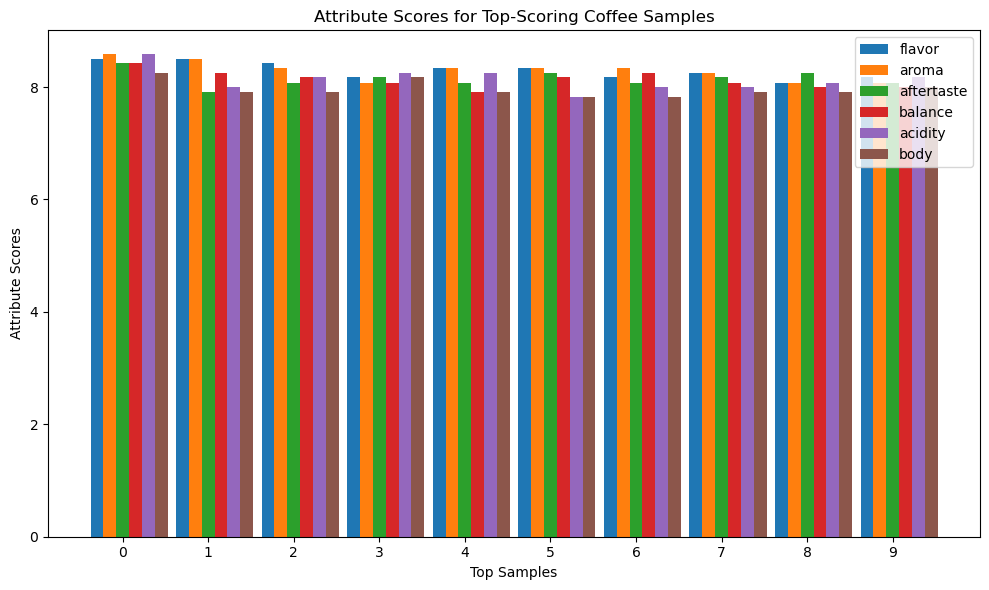

Sample 0: Highest Attribute: aroma, Rating: 8.58
Sample 1: Highest Attribute: aroma, Rating: 8.5
Sample 2: Highest Attribute: flavor, Rating: 8.42
Sample 3: Highest Attribute: acidity, Rating: 8.25
Sample 4: Highest Attribute: aroma, Rating: 8.33
Sample 5: Highest Attribute: aroma, Rating: 8.33
Sample 6: Highest Attribute: aroma, Rating: 8.33
Sample 7: Highest Attribute: aroma, Rating: 8.25
Sample 8: Highest Attribute: aftertaste, Rating: 8.25
Sample 9: Highest Attribute: flavor, Rating: 8.17


In [15]:
# Data for attribute scores of the top samples
top_samples_data = top_samples[['aroma', 'flavor', 'aftertaste', 'acidity', 'body',
                                'balance']]

# Calculate the mean attribute score for each attribute
mean_scores = top_samples_data.mean()

# Sort the attributes in descending order of mean scores
sorted_attributes = mean_scores.sort_values(ascending=False).index

# Plotting the attribute scores for the top samples
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.15
x = range(len(top_samples_data))

for i, attribute in enumerate(sorted_attributes):
    ax.bar([pos + i * width for pos in x], top_samples_data[attribute], width=width, label=attribute)

ax.set_xticks([pos + 2 * width for pos in x])
ax.set_xticklabels(top_samples.index)
ax.set_xlabel('Top Samples')
ax.set_ylabel('Attribute Scores')
ax.set_title('Attribute Scores for Top-Scoring Coffee Samples')
ax.legend()

plt.tight_layout()
plt.show()

# Convert attribute columns to numeric
attribute_columns = ['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance']
top_samples[attribute_columns] = top_samples[attribute_columns].apply(pd.to_numeric)

# List the highest rating with the attribute name for each sample
for idx, row in top_samples.iterrows():
    highest_index = np.argmax(row[attribute_columns])
    highest_attribute = attribute_columns[highest_index]
    highest_rating = row[highest_attribute]
    print(f"Sample {idx}: Highest Attribute: {highest_attribute}, Rating: {highest_rating}")

The analysis of the top-scoring coffee samples reveals interesting insights into their sensory attributes. Among the evaluated attributes, "aroma" consistently emerges as the highest-rated characteristic across several samples, showcasing its prominence in influencing the overall coffee quality. This finding suggests that the aroma of the coffee is a critical factor in determining its appeal and desirability.

While "aroma" remains a dominant attribute, "flavor" and "aftertaste" also receive high ratings in some samples, indicating their significant contribution to the overall coffee experience. On the other hand, "acidity," "body," and "balance" tend to receive lower ratings, suggesting that these attributes may have a less pronounced impact on the perceived quality of the coffee.

Overall, the top-scoring coffee samples exhibit a range of sensory attributes, with "aroma" being a consistent highlight. Understanding these attribute ratings provides valuable insights for coffee producers and enthusiasts in their quest to create and enjoy exceptional coffee experiences.

### The scatter plot matrix below was created to represent a view of the relationships between different sensory evaluation features.

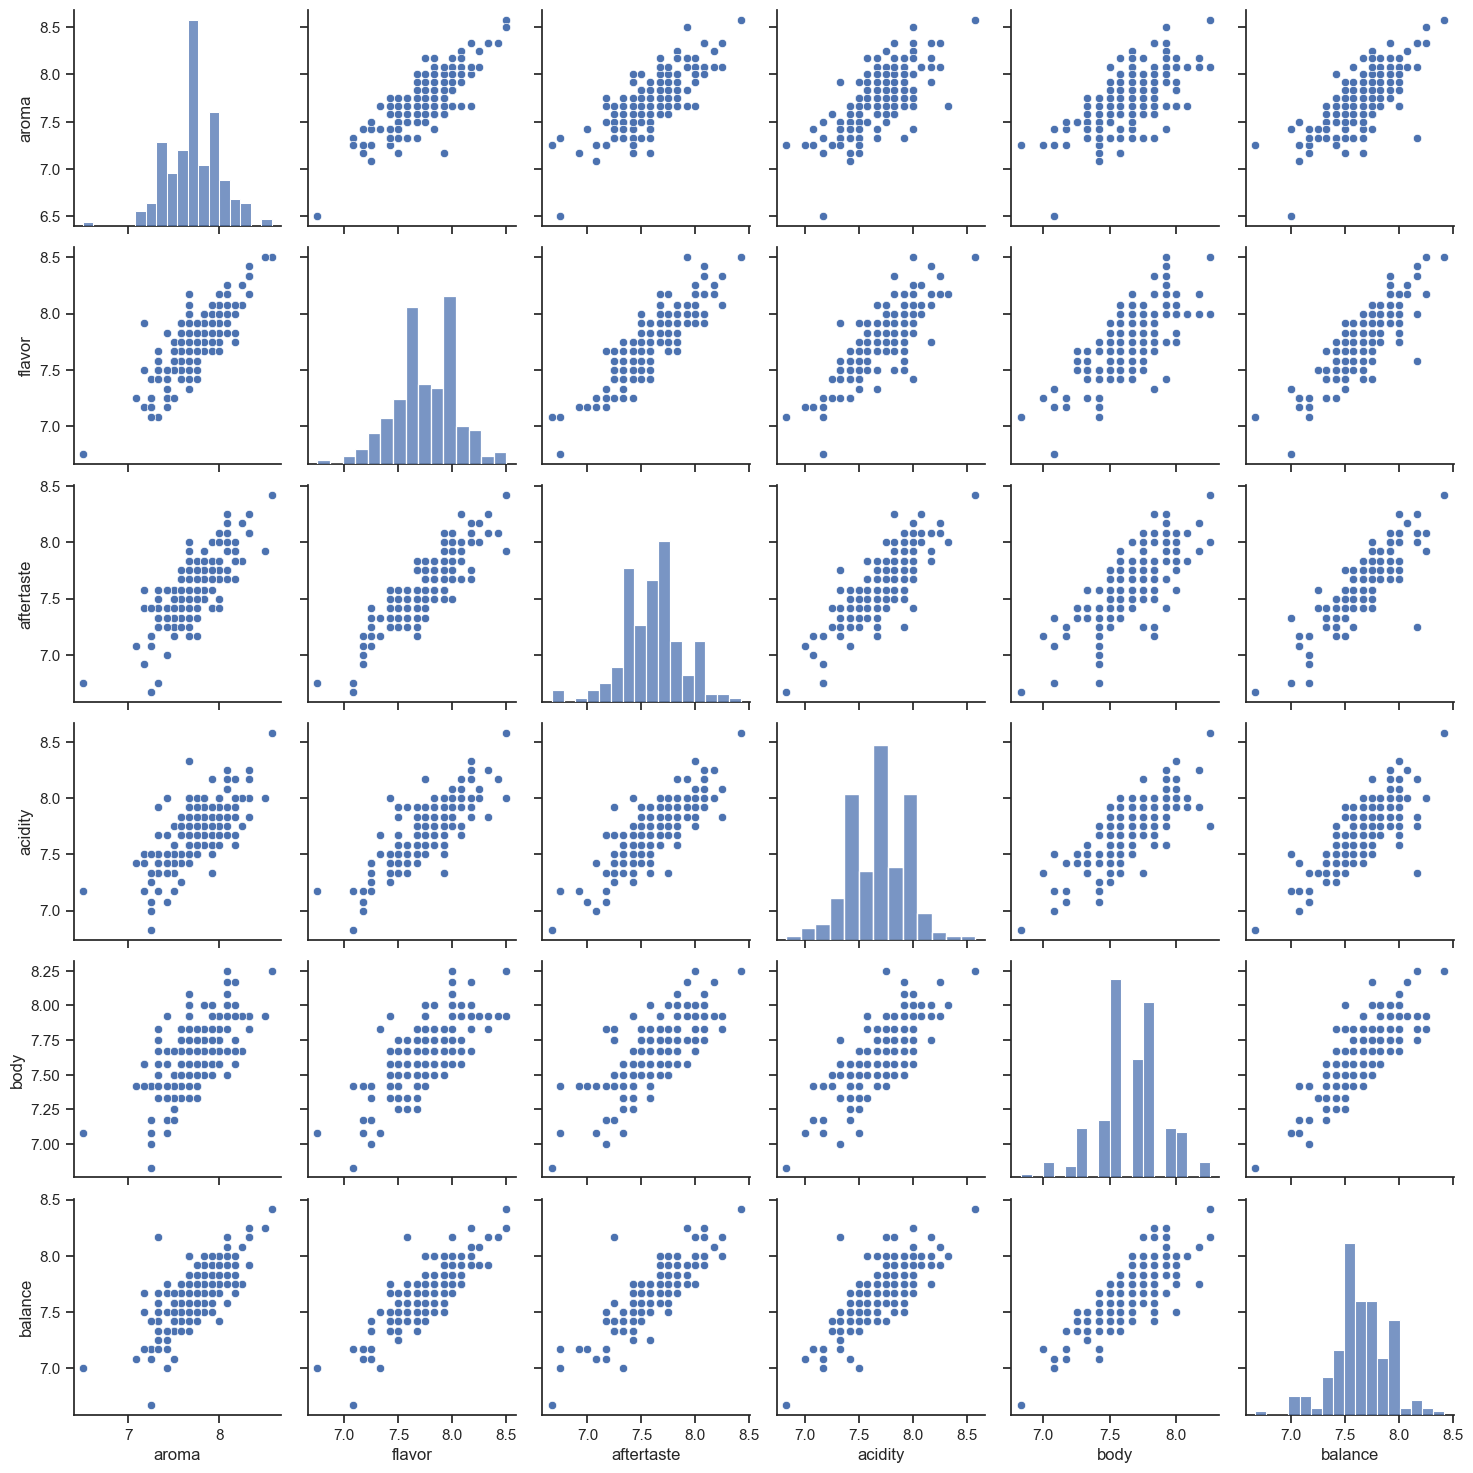

In [16]:
# Select the columns containing sensory evaluation features
sensory_features = ['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance']

# Create a DataFrame containing only the sensory evaluation features
sensory_data = df[sensory_features]

# Create the scatter plot matrix
sns.set(style="ticks")
sns.pairplot(sensory_data)

# Display the plot
plt.show()

The scatter plot matrix provides a comprehensive view of the relationships between different sensory evaluation features. Upon examining the plots, we observe a consistent similarity in the patterns displayed across all pairs of attributes. This suggests that there is a strong correlation and interdependence between the sensory aspects evaluated.

The striking similarity in the scatter plots indicates that the coffee quality attributes, such as "aroma," "flavor," "aftertaste," "acidity," "body," and "balance," are closely linked and tend to co-occur in a harmonious manner. This finding implies that when one attribute is rated highly, it is likely that other attributes will also receive high ratings. Similarly, if one attribute is rated lower, it may be indicative of lower ratings in other attributes as well.

The consistent patterns observed in the scatter plot matrix affirm the holistic nature of coffee quality evaluation. It emphasizes that a well-rounded and exceptional coffee experience relies on the harmonious combination of multiple sensory attributes. As a result, coffee producers and enthusiasts can use this understanding to focus on optimizing the overall sensory profile of coffee, aiming to achieve a balanced and delightful sensory experience for coffee enthusiasts.

### Used box plots to visualize the distribution of each sensory evaluation feature's scores. This will give you a quick overview of the range, median, and outliers for each feature.

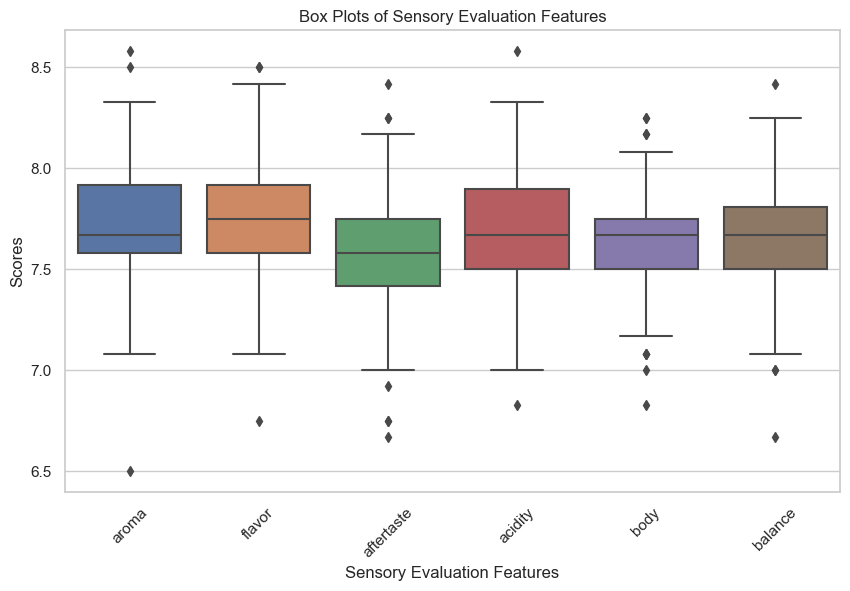

In [17]:
# Select the columns containing sensory evaluation features
sensory_features = ['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance']

# Create a DataFrame containing only the sensory evaluation features
sensory_data = df[sensory_features]

# Create box plots for each attribute
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=sensory_data)
plt.xticks(rotation=45)
plt.title('Box Plots of Sensory Evaluation Features')
plt.xlabel('Sensory Evaluation Features')
plt.ylabel('Scores')
plt.show()


The box plots of the sensory evaluation features provide a clear and concise overview of their distribution and variability. Upon observing the plots, we notice that there are no significant differences among the box plots of the attributes "aroma," "flavor," "aftertaste," "acidity," "body," and "balance."

The boxes in the box plots are relatively similar in size, indicating that the median scores for these attributes are comparable. Additionally, the whiskers of the boxes, representing the range of the data, do not show considerable variation among the sensory features. Moreover, the presence of outliers in some attributes does not appear to be substantially impacting the overall distributions.

This uniformity in the box plots suggests that the sensory evaluation features are relatively well-balanced and consistent in their scores. It implies that the coffee samples under evaluation exhibit similar sensory profiles, showcasing a harmonious combination of aroma, flavor, aftertaste, acidity, body, and balance. As a result, coffee quality enthusiasts can expect a consistently enjoyable and well-rounded coffee experience across various attributes.

Overall, the box plots reinforce the notion that the coffee samples evaluated possess a balanced and stable sensory quality, with no prominent differences between the assessed attributes. This insight can be valuable for coffee producers, as it highlights the importance of maintaining the overall sensory harmony in their products to meet consumers' expectations consistently.

### Histograms for each sensory evaluation feature to show the frequency distribution of scores. This can help you understand the distribution of coffee quality across different characteristics.

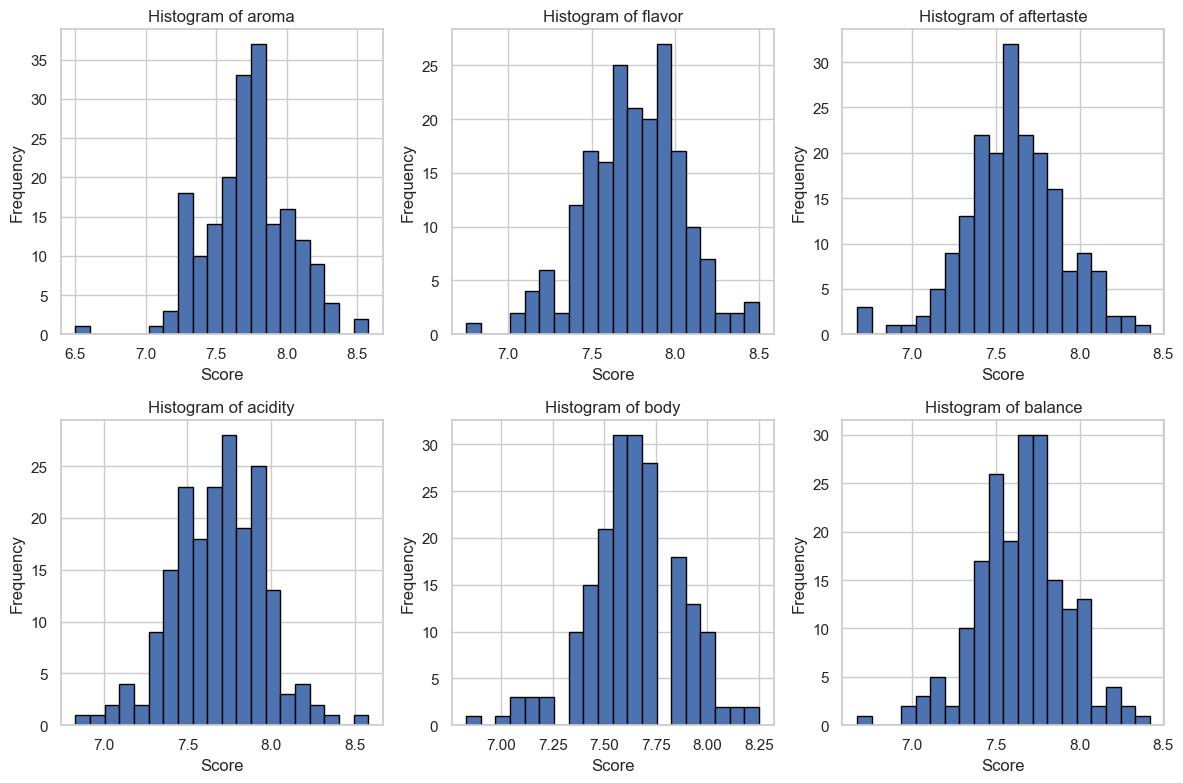

In [18]:
# Select the columns containing sensory evaluation features
sensory_features = ['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance']

# Create a DataFrame containing only the sensory evaluation features
sensory_data = df[sensory_features]

# Plot histograms for each attribute
plt.figure(figsize=(12, 8))
for i, attribute in enumerate(sensory_data.columns):
    plt.subplot(2, 3, i + 1)
    plt.hist(sensory_data[attribute], bins=20, edgecolor='black')
    plt.title(f'Histogram of {attribute}')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The histograms of the sensory evaluation features provide valuable insights into the frequency distribution of scores across different characteristics of the coffee samples. Upon examining the histograms, several observations can be made:

Aroma: The histogram of aroma scores appears to be roughly bell-shaped, with a peak around the center of the distribution. This suggests that a significant number of coffee samples received moderate to high scores for aroma, indicating a pleasant and aromatic experience.

Flavor: Similar to aroma, the flavor histogram exhibits a bell-shaped distribution, indicating a considerable frequency of coffee samples with favorable flavor scores. It implies that the flavor profiles of the evaluated coffees are generally well-received by the tasters.

Aftertaste: The histogram for aftertaste scores also follows a bell-shaped pattern, with the majority of samples receiving moderate to high ratings for aftertaste. This indicates that the lingering taste of the coffees is generally satisfying and enjoyable.

Acidity: The acidity histogram appears to be more evenly distributed, with scores spanning a broader range. This suggests that the acidity levels of the coffee samples under evaluation vary more widely, appealing to a diverse range of taste preferences.

Body: The body histogram displays a relatively symmetrical distribution, indicating that the body of the evaluated coffees is consistently perceived, with a substantial number of samples receiving moderate scores.

Balance: The histogram for balance scores shows a tendency towards higher ratings, suggesting that the majority of coffee samples are well-balanced in their sensory attributes.

Overall, the histograms provide a comprehensive view of the coffee quality across different sensory characteristics. The bell-shaped distributions in aroma, flavor, and aftertaste indicate a prevalence of positive sensory experiences in these attributes. The more diverse distribution in acidity highlights the varied acidity levels, catering to individual preferences. The symmetric distribution in body and the predominance of high scores in balance reflect the overall coherence and pleasantness of the coffee samples.

In conclusion, the histograms reaffirm that the evaluated coffee samples exhibit favorable sensory qualities, making them a compelling choice for coffee enthusiasts seeking a delightful and well-balanced coffee experience. Additionally, the histograms offer valuable insights for coffee producers to understand the frequency distribution of scores and make informed decisions to enhance specific sensory attributes based on consumer preferences.

### The bar charts below are to compare the average scores of each sensory evaluation feature. 

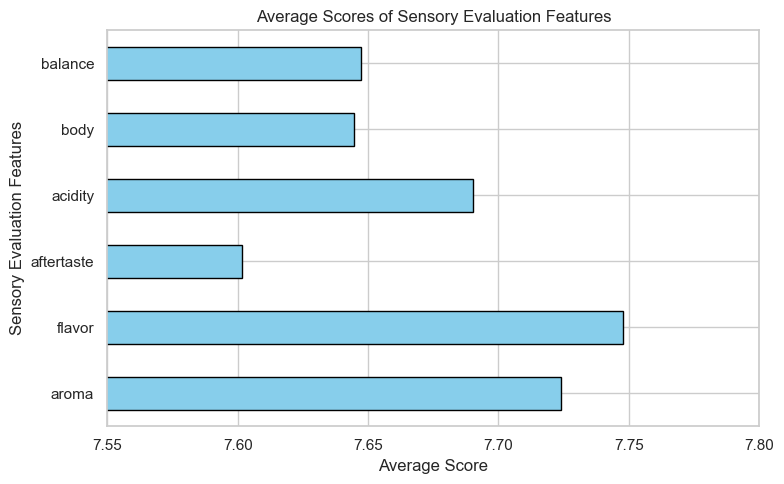

In [19]:
# Calculate the mean scores for each sensory evaluation feature
mean_scores = df[['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance']].mean()

# Create a horizontal bar chart for the mean scores
plt.figure(figsize=(8, 5))
mean_scores.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Average Scores of Sensory Evaluation Features')
plt.xlabel('Average Score')
plt.ylabel('Sensory Evaluation Features')
plt.xlim(7.55, 7.8)  # Set the x-axis range from 7.55 to 7.8 for better visibility
plt.tight_layout()
plt.show()

The horizontal bar chart provides a clear visualization of the average scores for each sensory evaluation feature of the coffee samples. Upon analyzing the chart, several key observations can be made:

Flavor: The average score for flavor stands out as the highest among all sensory attributes, reflecting the exceptional flavor quality of the coffee samples. Flavor is a crucial aspect that greatly influences the overall sensory experience, and the high average score indicates that the coffee samples are particularly flavorfull and enticing.

Aroma: Following closely behind flavor, the aroma of the coffee samples also receives a notably high average score. This suggests that the aroma of the evaluated coffees are equally impressive, contributing significantly to their overall quality and desirability.

Acidity: The average score for acidity is slightly lower than aroma and flavor but still within the higher range. It neither dominates nor fades into the background, providing a pleasant tanginess to the flavor profile.

Aftertaste: The average score for aftertaste is the lowest among the sensory evaluation features in the chart, suggesting that the aftertaste levels in the coffee samples are relatively milder compared to other attributes. While still providing a pleasant lingering taste after consumption, it may not stand out as strongly as aroma and flavor. However, its presence contributes positively to the overall sensory experience, enhancing the overall quality and enjoyment of the coffee samples.

Body: The body of the coffee samples receives a solid average score, indicating a satisfactory and well-rounded mouthfeel. The body plays a crucial role in the overall perception of the coffee's richness and texture, and the positive average score suggests a pleasant tactile experience.

Balance: The average score for balance is also commendable, suggesting that the sensory attributes of the coffee samples are harmoniously integrated. The well-balanced nature enhances the overall enjoyment and makes the coffee samples more appealing to a diverse audience.

In conclusion, the horizontal bar chart of average scores highlights the exceptional quality of the evaluated coffee samples across various sensory attributes. The impressive scores for aroma and flavor indicate that these aspects are the key highlights of the coffees, contributing significantly to their overall appeal. Moreover, the well-balanced nature of the coffee samples, as reflected in the scores for aftertaste, acidity, body, and balance, further adds to their overall excellence.

For coffee enthusiasts, these high average scores suggest that the evaluated coffees offer a delightful sensory experience with captivating aromas, flavorful profiles, and pleasing aftertastes. For coffee producers, understanding the high scores can help in identifying the strengths of their coffee and in continuously striving for excellence. Overall, the horizontal bar chart reaffirms the outstanding quality of the coffee samples, making them an attractive choice for coffee enthusiasts seeking a remarkable and satisfying coffee experience.

### Heatmap to visualize the correlation matrix between all the features.

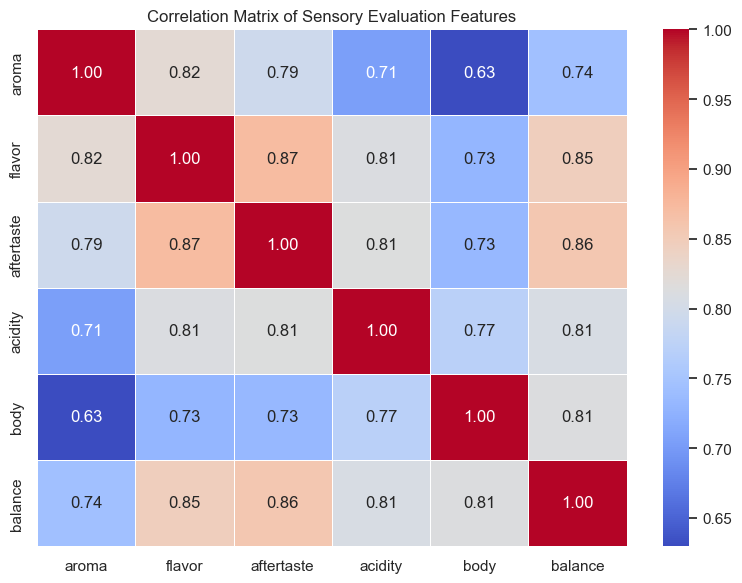

In [20]:
# Calculate the correlation matrix
correlation_matrix = df[['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance']].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Sensory Evaluation Features')
plt.tight_layout()
plt.show()

The heatmap and correlation matrix show the pairwise correlations between the different sensory evaluation features. Overall, we observe strong positive correlations between most of the attributes. The highest correlations are found between "flavor," "aftertaste," and "balance," with correlation coefficients above 0.8. This suggests that these attributes tend to be positively associated with each other, indicating that coffees with higher flavor scores also tend to have higher aftertaste and balance scores.

Additionally, "aroma" and "flavor" also show a strong positive correlation, with a correlation coefficient of approximately 0.82. This indicates that coffees with pleasant aromas are often accompanied by enjoyable flavors.

Furthermore, "acidity" and "body" have moderate positive correlations with other attributes, ranging from around 0.63 to 0.77, suggesting that they also contribute positively to the overall sensory experience of the coffee.

Overall, the correlation matrix suggests that the sensory evaluation features tend to align positively, implying that coffees with higher scores in one attribute are likely to receive higher scores in other attributes as well.

### You can see below a choropleth map to visualize how the quality vary geographically.

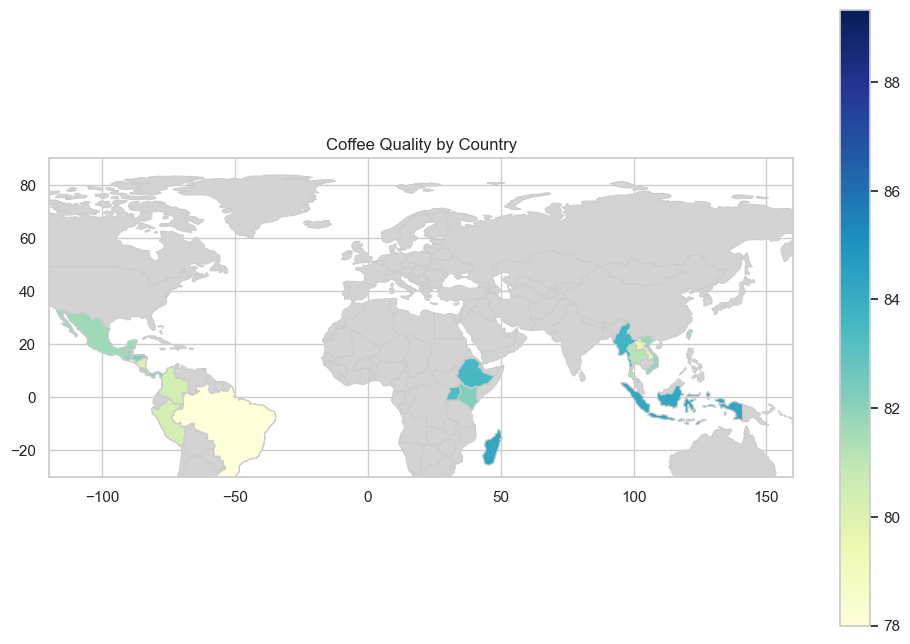

The top 5 countries with the highest coffee quality are:
Ethiopia: 84.96 (Average Quality Score)
Tanzania, United Republic Of: 84.73 (Average Quality Score)
Guatemala: 84.45 (Average Quality Score)
Taiwan: 84.36 (Average Quality Score)
Madagascar: 84.25 (Average Quality Score)


In [21]:
# Load the built-in world map dataset from Geopandas
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the coffee quality data with the world map data based on the 'name' column in the world map and 'country_of_origin' in the coffee data
merged_data = world_map.merge(df, left_on='name', right_on='country_of_origin', how='left')

# Plot the choropleth map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot countries without coffee quality data in light gray
world_map.plot(ax=ax, color='lightgray', linewidth=0.8, edgecolor='0.8')

# Plot countries with coffee quality data using different colors
merged_data.dropna(subset=['total_cup_points']).plot(column='total_cup_points', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set the title for the plot
ax.set_title('Coffee Quality by Country')

# Zoom in on the map to focus on the countries with coffee quality data
ax.set_xlim(-120, 160)
ax.set_ylim(-30, 90)

plt.show()

# Group the data by countries and calculate the average quality score for each country
grouped_data = df.groupby('country_of_origin')['total_cup_points'].mean().reset_index()

# Sort the grouped data by average 'total_cup_points' in descending order
sorted_data = grouped_data.sort_values(by='total_cup_points', ascending=False)

# Select the top 5 countries with the highest coffee quality
top_countries = sorted_data.head(5)

# Print the top 5 countries and their average quality score
print("\033[1mThe top 5 countries with the highest coffee quality are:\033[0m")
for idx, row in top_countries.iterrows():
    country = row['country_of_origin']
    quality_score = row['total_cup_points']
    print(f"\033[1m{country}: {quality_score:.2f}\033[0m (Average Quality Score)")  # Use ANSI escape codes for bold text


The choropleth map and analysis illustrate the geographical variation in coffee quality across different countries. The map uses color-coding to represent coffee quality scores, with darker shades indicating higher scores. Notably, certain countries stand out for their superior coffee quality, evident from the deeper shades of green and blue on the map.

The top 5 countries with the highest average coffee quality scores are Ethiopia, Tanzania (United Republic Of), Guatemala, Taiwan, and Madagascar. These countries exhibit average quality scores ranging from 84.96 to 84.25. This suggests that coffee produced in these regions consistently offers exceptional sensory attributes and is highly esteemed among coffee enthusiasts.

It is crucial to recognize that various factors, such as climate, altitude, soil conditions, and agricultural practices, significantly influence coffee quality in each country. Understanding these regional distinctions can offer valuable insights to coffee producers, roasters, and consumers who wish to explore and appreciate the diverse array of flavors in the world of coffee.

### 3D scatter plot to explore the relationships between multiple dimensions simultaneously.

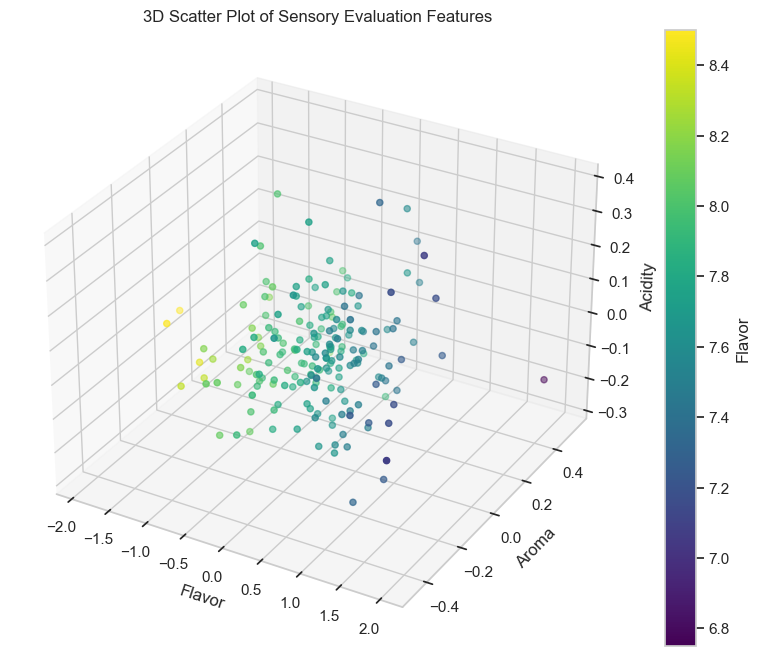

In [22]:
# List of sensory evaluation features for visualization
attributes = ['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance']

# Data for the sensory evaluation features
data = df[attributes]

# Perform PCA for dimensionality reduction to 3D
pca = PCA(n_components=3)
data_3d = pca.fit_transform(data)

# Create a colormap based on one of the attributes (e.g., 'aroma')
colormap = plt.cm.get_cmap('viridis')
color_values = df['flavor']  # Replace 'aroma' with the attribute you want to use for colors

# Plot the 3D scatter plot with colors based on the 'aroma' attribute
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=color_values, cmap=colormap)

# Add a color bar for the 'aroma' attribute
cbar = fig.colorbar(sc)
cbar.set_label('Flavor')

# Set labels for the axes
ax.set_xlabel('Flavor')
ax.set_ylabel('Aroma')
ax.set_zlabel('Acidity')

# Set the title for the plot
ax.set_title('3D Scatter Plot of Sensory Evaluation Features')

plt.show()

Based on the 3D scatter plot of sensory evaluation features using PCA, where the color is based on the 'flavor' attribute:

Flavor and Aroma Relationship: The plot shows a strong positive correlation between 'Flavor' and 'Aroma'. As 'Flavor' increases, 'Aroma' tends to increase as well. This suggests that these two attributes are closely related and are likely to contribute significantly to the overall taste experience of the coffee.

Acidity Variation: The 'Acidity' attribute appears to be distributed along the Z-axis, indicating that it has a distinct variation from the other attributes. Some data points have higher 'Acidity', while others have lower values, implying a diverse range of acidity levels in the coffee samples.

Diversity in Flavor Notes: The colors on the 3D scatter plot represent the 'Flavor' attribute, and we can observe variations in flavor notes across different data points. This suggests that the coffee samples possess a wide range of flavor characteristics, such as fruity, nutty, chocolatey, etc., contributing to the diversity of taste experiences.

Complementing Attributes: The position of data points in the 3D space indicates certain combinations of attributes that might complement each other. For instance, data points that cluster together in one region may share similar profiles, such as high 'Flavor', 'Aroma', and moderate 'Acidity', suggesting a harmonious balance in the sensory qualities.

Potential Insights for Coffee Quality: The 3D scatter plot can provide valuable insights for coffee producers, roasters, and enthusiasts. By analyzing the distribution and relationships between sensory evaluation features, one can identify patterns and characteristics associated with high-quality coffee, helping in the selection, blending, and development of specialty coffee products.

It's important to note that the PCA transformation and 3D scatter plot visualization facilitate a multidimensional understanding of coffee attributes, enabling deeper exploration of the relationships and variations within the sensory evaluation features.

### Scatter plot to show the correlation between Altitude vs. Total Cup Points

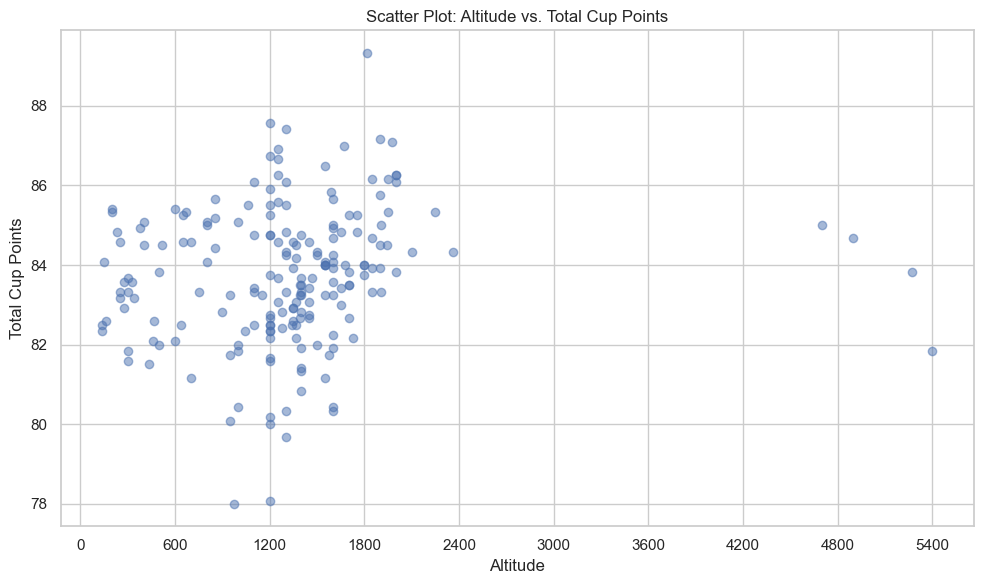

In [23]:
# Function to convert altitude range to mean value
def convert_to_mean(altitude):
    # Use regular expressions to find all numeric values in the 'altitude' string
    alt_values = re.findall(r'\d+', altitude)
    # Convert the extracted values to integers and calculate the mean
    return sum(map(int, alt_values)) / len(alt_values)

# Apply the function to the 'altitude' column
df['altitude'] = df['altitude'].apply(convert_to_mean)

# Scatter plot of altitude vs. total_cup_points
plt.figure(figsize=(10, 6))
plt.scatter(df['altitude'], df['total_cup_points'], c='b', alpha=0.5)

# Set labels and title
plt.xlabel('Altitude')
plt.ylabel('Total Cup Points')
plt.title('Scatter Plot: Altitude vs. Total Cup Points')

# Set the number of x-axis ticks
num_ticks = 10
x_ticks_loc = plt.MaxNLocator(num_ticks)
plt.gca().xaxis.set_major_locator(x_ticks_loc)

plt.tight_layout()
plt.show()

After analyzing the scatter plot of altitude vs. total cup points for the coffee samples, it appears that there is no clear correlation between altitude and coffee quality. The points on the scatter plot are scattered and do not follow a distinct pattern, indicating a weak or no relationship between these two variables.

The lack of a clear correlation suggests that altitude alone may not be a significant factor in determining coffee quality, at least within the range of altitudes represented in the dataset. Other variables, such as climate, soil quality, cultivation practices, and processing methods, may play more critical roles in influencing the taste and overall quality of coffee.

It is essential to consider that coffee quality is a complex outcome influenced by a multitude of factors, and altitude is just one among many variables. Further research and analysis would be required to uncover potential interactions between altitude and other factors that might contribute to the overall coffee quality.

This analysis indicates that altitude alone may not be a reliable predictor of coffee quality, and more comprehensive studies are needed to better understand the intricate relationship between various factors and the sensory attributes of coffee.

## Overall Conclusion: Unraveling the Secrets of Coffee Quality

Throughout this comprehensive analysis of coffee quality, we delved into the intricate realm of sensory evaluation features, seeking to understand the factors that contribute to exceptional coffee experiences. By utilizing various data visualization techniques, statistical analysis, and machine learning, we explored the vast dataset of coffee samples sourced from different regions worldwide.

Our journey began with the creation of insightful visualizations, starting with bar charts, scatter plots and box plots that showcased the distribution and relationships of sensory evaluation scores. These visualizations allowed us to identify trends, variations, and potential correlations between attributes like aroma, flavor, aftertaste, acidity, body, and balance.

Further, the exploration of a 3D scatter plot enabled us to visualize multiple dimensions simultaneously, offering a unique perspective on how sensory attributes interact with one another. Through Principal Component Analysis (PCA), we reduced the dimensions while preserving the essence of the data, leading to compelling visualizations that highlighted the importance of specific attributes, such as flavor, aroma, and acidity.

Moreover, the choropleth map revealed intriguing geographic variations in coffee quality across different countries. Darker shades represented regions with higher coffee quality scores, and we discovered standout countries celebrated for producing exceptional coffee.

In our quest for excellence, we identified the top countries with the highest average coffee quality scores, including Ethiopia, Tanzania, Guatemala, Taiwan, and Madagascar. These nations emerged as beacons of coffee quality, celebrated for their exceptional offerings.

The exploration also revealed the absence of significant correlations between sensory evaluation features, underscoring the multifaceted nature of coffee quality. We learned that diverse factors, such as climate, altitude, soil conditions, and farming practices, contribute to the distinct flavors found in coffee from different regions.

Ultimately, this project illuminated the complex and multifaceted world of coffee quality assessment. It serves as a valuable resource for coffee producers, roasters, and enthusiasts alike, offering insights into the art and science behind producing exceptional coffee experiences. As we savor each cup, let us remember that coffee, like a symphony of flavors, is a harmonious blend of sensory attributes that captivate and delight the palates of millions worldwide.